In [2]:
from scipy.stats import pearsonr
import pandas as pd



In [16]:
# Load data
df = pd.read_csv("data/green_monkey/all_structure_files/chr1/chr1_feature_agreement_summary.csv")

df.head()

,gene_name,log2FC_12h,log2FC_18h,log2FC_24h,acc_untr_12h_tss,acc_untr_12h_avg,acc_vacv_12h_tss,acc_vacv_12h_avg,acc_untr_18h_tss,acc_untr_18h_avg,...,expr_only_down,acc_only_up,acc_only_down,expr_up_acc_down,expr_down_acc_up,agreement_class,tsne_1,tsne_2,tsne_expr_1,tsne_expr_2
0,BET1L,-0.315039,-0.368512,-0.155558,18.76570,23.817953,6.06692,16.777641,3.32283,13.126565,...,0,2,1,0,0,accessibility_only,-15.009315,3.647945,-15.009315,3.647945
1,RIC8A,-0.295795,-0.221668,-0.362167,18.76570,19.728002,4.04461,16.552940,4.22906,15.305173,...,0,1,2,0,0,accessibility_only,-19.110851,1.868840,-19.110851,1.868840
2,SIRT3,0.552196,-0.984313,0.300940,3.84937,15.466200,4.71871,12.673082,3.62491,9.389523,...,1,1,1,0,0,expression_only,-10.827722,-10.180895,-10.827722,-10.180895
3,PSMD13,-0.625220,-0.688457,-0.557435,8.66107,16.039015,17.52660,15.953700,5.73944,10.908291,...,0,1,0,0,2,conflict,-27.876356,5.604334,-27.876356,5.604334
4,NLRP6,0.000000,0.000000,3.404529,2.88702,3.007315,4.04461,5.055765,3.02076,3.840676,...,0,2,0,1,0,accessibility_only,42.989323,12.824819,42.989323,12.824819


In [17]:
from scipy.stats import pearsonr
import numpy as np

# Select relevant columns
expr_cols = ['log2FC_12h', 'log2FC_18h', 'log2FC_24h']
acc_cols = ['acc_delta_12h_tss', 'acc_delta_18h_tss', 'acc_delta_24h_tss']

# Function to compute correlation for each gene
def compute_corr(row):
    expr = row[expr_cols].values
    acc = row[acc_cols].values
    if np.any(pd.isnull(expr)) or np.any(pd.isnull(acc)):
        return np.nan
    return pearsonr(expr, acc)[0]

# Apply correlation computation
df['expr_acc_corr'] = df.apply(compute_corr, axis=1)

# Show summary statistics and preview
df['expr_acc_corr'].describe(), df[['gene_name', 'expr_acc_corr']].dropna().head()


(count    802.000000
 mean       0.040275
 std        0.718202
 min       -0.999958
 25%       -0.688173
 50%        0.115876
 75%        0.743096
 max        1.000000
 Name: expr_acc_corr, dtype: float64,
   gene_name  expr_acc_corr
 0     BET1L       0.538613
 1     RIC8A       0.988402
 2     SIRT3       0.291733
 3    PSMD13      -0.562047
 4     NLRP6      -0.996670)

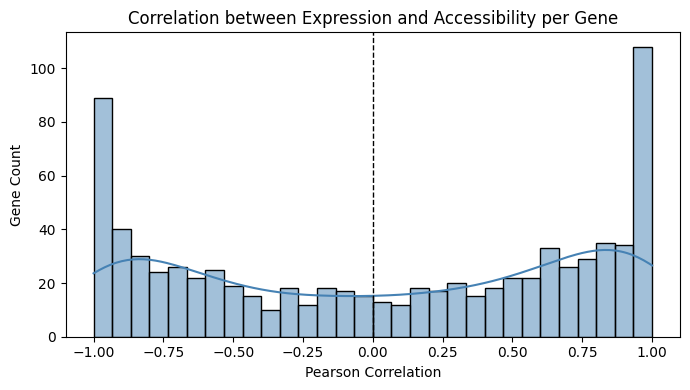

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histogram of correlation values
plt.figure(figsize=(7, 4))
sns.histplot(df['expr_acc_corr'].dropna(), bins=30, kde=True, color='steelblue')
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.title("Correlation between Expression and Accessibility per Gene")
plt.xlabel("Pearson Correlation")
plt.ylabel("Gene Count")
plt.tight_layout()
plt.show()


/var/folders/29/w54hnxjs18q9cvq1pfzwym540000gn/T/ipykernel_20946/3144048982.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_agreement, x='agreement_class', y='expr_acc_corr', palette='Set2')


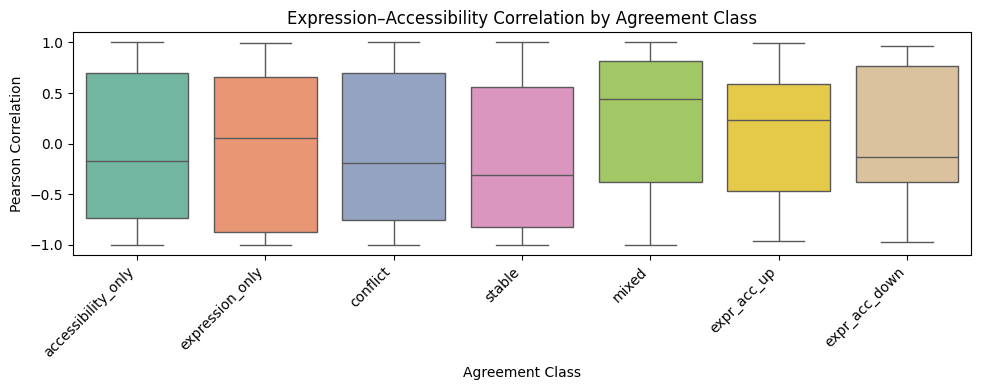

In [19]:
# Only use agreement_class and expr_acc_corr
df_agreement = df[['agreement_class', 'expr_acc_corr']].dropna()

# Boxplot: correlation grouped by agreement class
plt.figure(figsize=(10, 4))
sns.boxplot(data=df_agreement, x='agreement_class', y='expr_acc_corr', palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.title("Expression–Accessibility Correlation by Agreement Class")
plt.ylabel("Pearson Correlation")
plt.xlabel("Agreement Class")
plt.tight_layout()
plt.show()


In [20]:
# Export gene_name, correlation, and agreement class
df_export = df[['gene_name', 'expr_acc_corr', 'agreement_class']].dropna()
export_path = "data/green_monkey/all_structure_files/chr1/ene_expr_acc_correlation_summary.csv"
df_export.to_csv(export_path, index=False)

export_path


'data/green_monkey/all_structure_files/chr1/ene_expr_acc_correlation_summary.csv'